# Alzheimer's Disease Classification
## Overview:
* Load and clean data.
* Exploratory Data Analysis.
* Preprocess data.
* train several models and determine the best.
* Visualize results with confusion  matrix

# Getting Started
In this classification I will be using the longtiduinal study. This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

### Description of Features

| Feature     | Description                         |
| ----------- | ----------------------------------- |
| ID          | Identification                      |
| Group       | Demented or Nondemented             |
| Visit       | The visit number                    |
| M/F         | Gender                              |
| Hand        | Dominant Hand                       |
| Age         | Age in years                        |
| Educ        | Years of Education                  |
| SES         | Socioeconomic Status                |
| MMSE        | Mini Mental State Examination       |
| CDR         | Clinical Dementia Rating            |
| eTIV        | Estimated Total Intracranial Volume |
| nWBV        | Normalize Whole Brain Volume        |
| ASF         | Atlas Scaling Factor                |
| Delay       | Delay                               |

# Packages & Libraries


In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import warnings 
warnings.filterwarnings('ignore')


# Load Data

In [30]:
data = pd.read_csv('../input/mri-and-alzheimers/oasis_longitudinal.csv')
data.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


# Data Cleaning

In [31]:
data = data.loc[data['Visit']==1]          #Only look at first visit
data = data.reset_index(drop=True)         #reset index after filtering first visit data

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  150 non-null    object 
 1   MRI ID      150 non-null    object 
 2   Group       150 non-null    object 
 3   Visit       150 non-null    int64  
 4   MR Delay    150 non-null    int64  
 5   M/F         150 non-null    object 
 6   Hand        150 non-null    object 
 7   Age         150 non-null    int64  
 8   EDUC        150 non-null    int64  
 9   SES         142 non-null    float64
 10  MMSE        150 non-null    float64
 11  CDR         150 non-null    float64
 12  eTIV        150 non-null    int64  
 13  nWBV        150 non-null    float64
 14  ASF         150 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 17.7+ KB


In [33]:
data = data[['Group', 'M/F', 'Age', 'EDUC', 'SES',
            'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]
data.rename(columns={'M/F':'Gender'}, inplace=True)
data.head()

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,Nondemented,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,Nondemented,M,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,Demented,M,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [34]:
#Check for missing values
data.isna().sum()

Group     0
Gender    0
Age       0
EDUC      0
SES       8
MMSE      0
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [35]:
data['SES'].value_counts()

2.0    42
3.0    34
1.0    33
4.0    30
5.0     3
Name: SES, dtype: int64

Socioeconomic Status is a categorical feature, therefore, we will fill in missing values with the mode.

In [36]:
data['SES'] = data['SES'].fillna(2.0)

In [37]:
data.isna().sum().sum()

0

In [38]:
#Binary encode object columns
data['Group'] = data['Group'].apply(lambda x: 1 if x == 'Demented' else 0)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

In [39]:
data.head(10)

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
2,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,1,1,71,16,2.0,28.0,0.5,1357,0.748,1.293
5,0,0,93,14,2.0,30.0,0.0,1272,0.698,1.380
6,1,1,68,12,2.0,27.0,0.5,1457,0.806,1.205
7,1,0,66,12,3.0,30.0,0.5,1447,0.769,1.213
8,0,0,78,16,2.0,29.0,0.0,1333,0.748,1.316
9,0,0,81,12,4.0,30.0,0.0,1230,0.715,1.427


In [40]:
data = data.astype('float64')
print(data.dtypes)

Group     float64
Gender    float64
Age       float64
EDUC      float64
SES       float64
MMSE      float64
CDR       float64
eTIV      float64
nWBV      float64
ASF       float64
dtype: object


# Alzheimer's Exploratory Data Analysis

In [41]:
data.describe()

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000
mean,0.426667,0.413333,75.446667,14.533333,2.466667,27.56000,0.260000,1474.426667,0.736073,1.206333
std,0.496250,0.494081,7.545421,2.874714,1.103178,2.96847,0.326256,174.683889,0.036458,0.137864
min,0.000000,0.000000,60.000000,6.000000,1.000000,17.00000,0.000000,1123.000000,0.660000,0.883000
25%,0.000000,0.000000,70.000000,12.000000,2.000000,26.00000,0.000000,1347.250000,0.710000,1.121000
50%,0.000000,0.000000,75.000000,14.000000,2.000000,29.00000,0.000000,1453.500000,0.735000,1.207500
75%,1.000000,1.000000,80.000000,16.000000,3.000000,30.00000,0.500000,1565.250000,0.757750,1.302750
max,1.000000,1.000000,96.000000,23.000000,5.000000,30.00000,1.000000,1987.000000,0.837000,1.563000


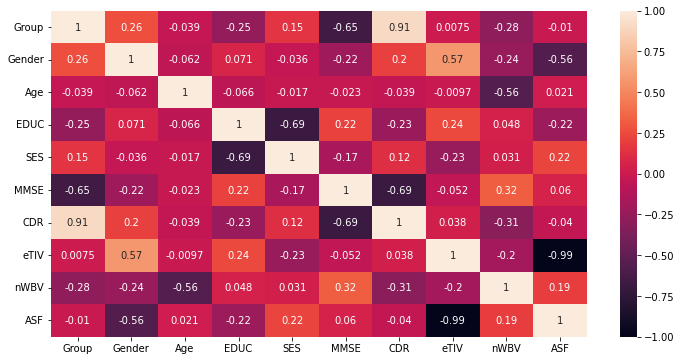

In [42]:
corr = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, vmin=-1)
plt.show()

### Relaionship between gender and dementia

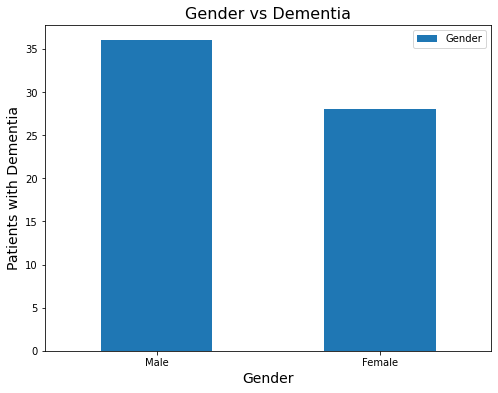

In [43]:
demented_group = data[data['Group']==1]['Gender'].value_counts()
demented_group = pd.DataFrame(demented_group)
demented_group.index=['Male', 'Female']
demented_group.plot(kind='bar', figsize=(8,6))
plt.title('Gender vs Dementia', size=16)
plt.xlabel('Gender', size=14)
plt.ylabel('Patients with Dementia', size=14)
plt.xticks(rotation=0)
plt.show()

### Relationship Between Age and Normalized Whole Brain Volume

Group: 0 = Nondemented, 1 = Demented

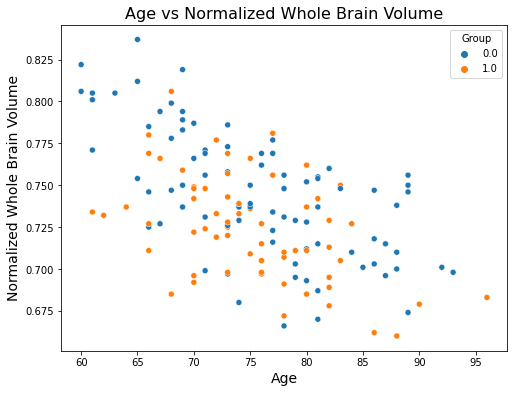

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='nWBV', data=data, hue='Group')
plt.title('Age vs Normalized Whole Brain Volume', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Normalized Whole Brain Volume', size=14)
plt.show()

### Relationship Between CDR and Dementia

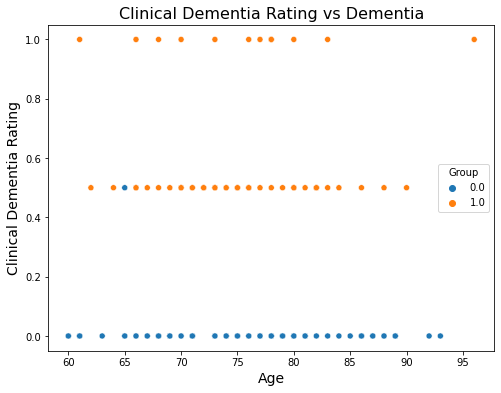

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='CDR', data=data, hue='Group')
plt.title('Clinical Dementia Rating vs Dementia', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Clinical Dementia Rating',size=14)
plt.show()

### Relationship between MMSE and Dementia

In [46]:
#print('Nondemented Group: \n',data.query('Group == 0')['MMSE'].value_counts().sort_values())
#print('Demented Group: \n',data.query('Group == 1')['MMSE'].value_counts().sort_values())

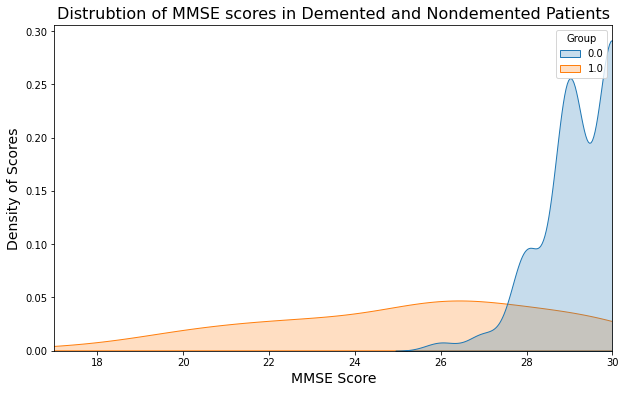

In [47]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='MMSE', shade=True, hue='Group', data=data)
plt.title('Distrubtion of MMSE scores in Demented and Nondemented Patients', size=16)
plt.xlim(data['MMSE'].min(), data['MMSE'].max())
plt.xlabel('MMSE Score', size=14)
plt.ylabel('Density of Scores', size=14)
plt.show()

### Relationship Between Education Years and Dementia

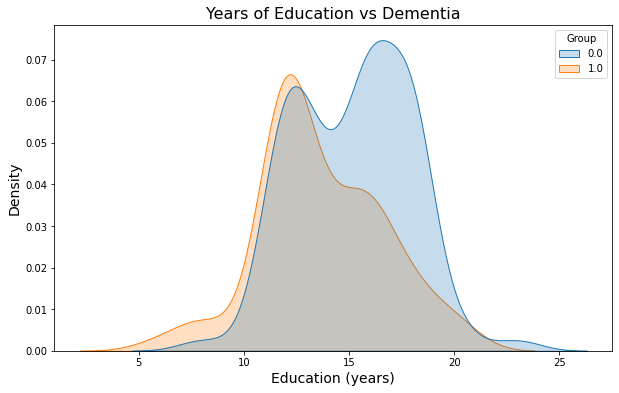

In [48]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='EDUC', shade=True, hue='Group', data=data)
plt.title('Years of Education vs Dementia', size=16)
plt.xlabel('Education (years)', size=14)
plt.ylabel('Density', size=14)
plt.show()

## EDA Conclusions
* In this dataset, it appears that there is a higher rate of dementia in males than females.
* Normalized Whole Brain Volume (nWBV) has a negative correlation with age in general, however, this correlation seems more pronunced in dementia patients.
* Clinical Dementia Rating (CDR) showed clear distinctions between demented and nondemented patients. Regardless of age, CDR seems to be a robust measure of dementia as, almost all patients with dementia showed a CDR score >= 0.5. Similarly, MMSE scores also show a distinction between the two groups. The MMSE scores for demented patients were much more spread out, ranging from 17-26, while nondemented individuals showed little varitation in MMSE score ranging from 26-30. Although we see a differnece in scores between demented and nondemented individuals the CDR seems to be much more robust than MMSE.
* Demented patients had less years of education in general as compared to nondemented patients. These findings align with many studies which have also demonstarted that less education is greater risk factor for AD (Sharp & Gatz, 2011).
* The relationship between Atlast Scoring Factor (ASF) and estimated total intracranial volume (eTIV) was almost 1-1. This is because ASF is the volume-scaling factor necessary to fit each individual. The ASF should be proportionate to TIV since atlas normalization equalizes head size(Buckner et al., 2004). Considering this, I do not feel ASF will be neccessary for our model.

## Data Preproccessing

In [49]:
def preprocessing_inputs(df):
    df = df.copy()
    
    #split df into X and y
    y = df['Group']
    X = df.drop(['Group', 'ASF'], axis=1)
    
    #Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    #Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [50]:
X_train, X_test, y_train, y_test = preprocessing_inputs(data)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (105, 8) (105,)
Test set: (45, 8) (45,)


In [51]:
X_train.head()

,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
118,1.132523,0.200412,0.527705,-1.317443,0.822813,-0.838054,1.264330,-0.597702
18,1.132523,0.858015,-0.823735,0.479070,-0.197605,0.705730,-0.384652,-0.679562
4,1.132523,-0.588711,0.527705,-0.419186,0.142534,0.705730,-0.750447,0.275463
45,1.132523,-1.377834,-0.485875,0.479070,0.482674,-0.838054,-0.721416,2.703954
59,-0.882984,0.989535,-0.485875,-0.419186,-0.197605,2.249514,-0.553034,-0.897853


# Model Training

In [52]:
models = {'         Logistic Regression': LogisticRegression(),
          '                         KNN': KNeighborsClassifier(),
          '    Decision Tree Classifier': DecisionTreeClassifier(),
          '              Neural Network': MLPClassifier(),
          '    Random Forest Classifier': RandomForestClassifier(),
          'Gradient Boosting Classifier': GradientBoostingClassifier()}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

         Logistic Regression trained.
                         KNN trained.
    Decision Tree Classifier trained.
              Neural Network trained.
    Random Forest Classifier trained.
Gradient Boosting Classifier trained.


# Model Results

### Accuracy Score

In [58]:
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    print(name + ' Accuracy: {:.2%}'.format(acc))

         Logistic Regression Accuracy: 100.00%
                         KNN Accuracy: 100.00%
    Decision Tree Classifier Accuracy: 100.00%
              Neural Network Accuracy: 100.00%
    Random Forest Classifier Accuracy: 100.00%
Gradient Boosting Classifier Accuracy: 100.00%


### F1-Score

In [54]:
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

         Logistic Regression F1-Score: 1.0
                         KNN F1-Score: 1.0
    Decision Tree Classifier F1-Score: 1.0
              Neural Network F1-Score: 1.0
    Random Forest Classifier F1-Score: 1.0
Gradient Boosting Classifier F1-Score: 1.0


# Confusion Matrix

In [59]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

def plot_confusion_matrix(y_test, yhat):
    cm = confusion_matrix(y_test, yhat)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap=plt.cm.Blues, cbar=False);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix', size=16); 
    ax.xaxis.set_ticklabels(['Nondemented', 'Demented']); ax.yaxis.set_ticklabels(['Nondemented', 'Demented'])

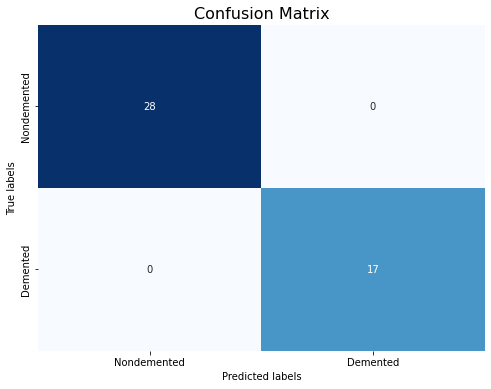

In [60]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
yhat = logreg.predict(X_test)
plt.figure(figsize=(8,6))
plot_confusion_matrix(y_test, yhat)

# References

1. Buckner RL, Head D, Parker J, Fotenos AF, Marcus D, Morris JC, Snyder AZ. A unified approach for morphometric and functional data analysis in young, old, and demented adults using automated atlas-based head size normalization: reliability and validation against manual measurement of total intracranial volume. Neuroimage. 2004 Oct;23(2):724-38. doi: 10.1016/j.neuroimage.2004.06.018. PMID: 15488422.

2. Sharp, E. S., & Gatz, M. (2011). Relationship between education and dementia: an updated systematic review. Alzheimer disease and associated disorders, 25(4), 289–304. https://doi.org/10.1097/WAD.0b013e318211c83c